In [28]:
# Importing a necessary libraries
# To manipulate and analyse data
import pandas as pd
# To make graphs and visualizations
import matplotlib.pyplot as plt
# For the visual representation of statistical data
import seaborn as sns
# For statistiacl calculations
import statistics
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [2]:
# Loading the CSV file into a DataFrame in Python
dataframe = pd.read_csv('/content/Sales.csv')


In [3]:
#To view size of rows and columns
dataframe.shape

(113036, 18)

In [4]:
# Getting the dataset column names
dataframe.columns


Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [5]:
#first five rows of data will be displayed
dataframe.head()


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [6]:
dataframe["Age_Group"].unique()

array(['Youth (<25)', 'Adults (35-64)', 'Young Adults (25-34)',
       'Seniors (64+)'], dtype=object)

In [7]:
# Grouping by age group and counting the number of orders for each age group
age_group_order_count = dataframe.groupby('Age_Group')['Order_Quantity'].count()

# Display the count of orders for each age group
print(age_group_order_count)


Age_Group
Adults (35-64)          55824
Seniors (64+)             730
Young Adults (25-34)    38654
Youth (<25)             17828
Name: Order_Quantity, dtype: int64


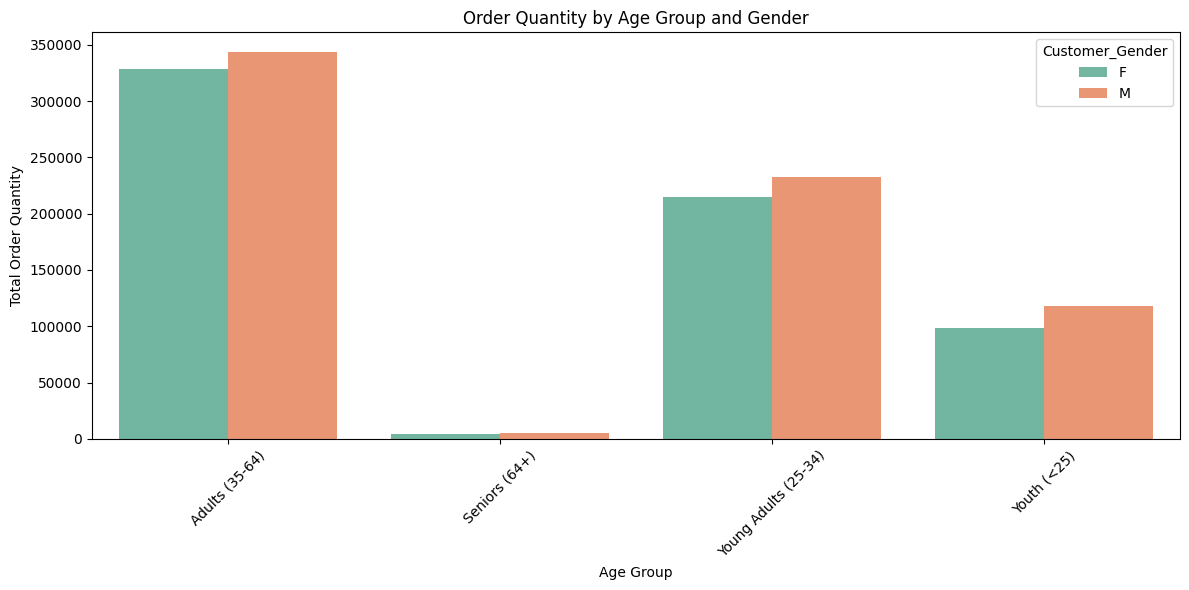

In [8]:
# Grouping by age group and sex, and summing the order quantity
age_sex_order_quantity = dataframe.groupby(['Age_Group', 'Customer_Gender'])['Order_Quantity'].sum().reset_index()

# Plotting the side-by-side bar plot for age group vs sex vs order quantity
plt.figure(figsize=(12, 6))
sns.barplot(x='Age_Group', y='Order_Quantity', hue='Customer_Gender', data=age_sex_order_quantity, palette='Set2')

# Adding titles and labels
plt.title('Order Quantity by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [9]:
#Create a DataFrame with unique value counts for each column by converting the DataFrame 'data'.
unique_counts =  pd.DataFrame.from_dict(dataframe)
# Calculating how many missing values (NaN) there are in each column.
counts = unique_counts.isna().sum()
#printng the sorted counts
print(counts.sort_values())

Date                0
Profit              0
Unit_Price          0
Unit_Cost           0
Order_Quantity      0
Product             0
Sub_Category        0
Product_Category    0
State               0
Country             0
Customer_Gender     0
Age_Group           0
Customer_Age        0
Year                0
Month               0
Day                 0
Cost                0
Revenue             0
dtype: int64


In [10]:
dataframe["Country"].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [11]:
# Grouping by country and summing the profit for each country
country_profit = dataframe.groupby('Country')['Profit'].sum()

# Display the profit for each country
print(country_profit)

Country
Australia          6776030
Canada             3717296
France             2880282
Germany            3359995
United Kingdom     4413853
United States     11073644
Name: Profit, dtype: int64


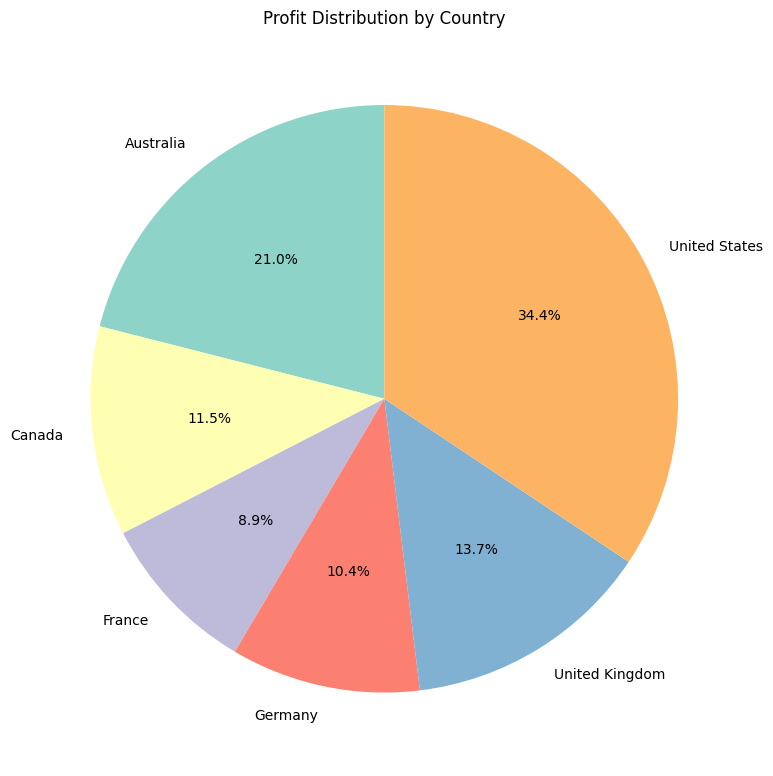

In [12]:
# Grouping by country and summing the profit
country_profit = dataframe.groupby('Country')['Profit'].sum()

# Plotting the pie chart for profit by country
plt.figure(figsize=(8, 8))
country_profit.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(country_profit)))
plt.title('Profit Distribution by Country')
plt.ylabel('')  # Remove y-label for aesthetics
plt.tight_layout()
plt.show()


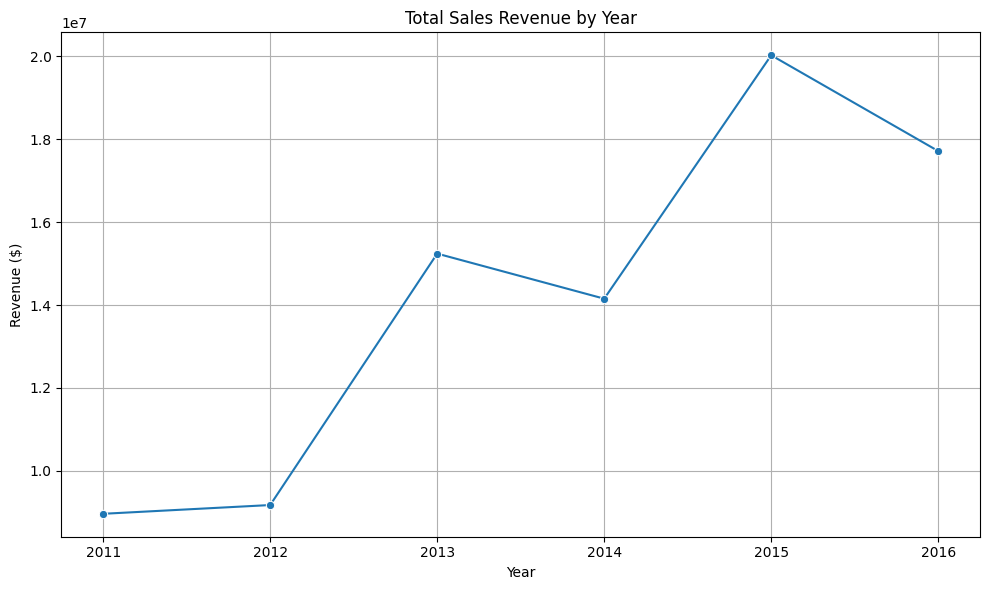

In [13]:
# Grouping by year and summing the revenue
dataframe['Year'] = pd.to_datetime(dataframe['Date']).dt.year  # Convert to datetime and extract year
yearly_revenue = dataframe.groupby('Year')['Revenue'].sum()

# Plotting the total revenue by year
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, marker='o')
plt.title('Total Sales Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# Generating descriptive statistics using describe function
description = dataframe.describe()
# printing description
print(description)

                 Day           Year   Customer_Age  Order_Quantity  \
count  113036.000000  113036.000000  113036.000000   113036.000000   
mean       15.665753    2014.401739      35.919212       11.901660   
std         8.781567       1.272510      11.021936        9.561857   
min         1.000000    2011.000000      17.000000        1.000000   
25%         8.000000    2013.000000      28.000000        2.000000   
50%        16.000000    2014.000000      35.000000       10.000000   
75%        23.000000    2016.000000      43.000000       20.000000   
max        31.000000    2016.000000      87.000000       32.000000   

           Unit_Cost     Unit_Price         Profit           Cost  \
count  113036.000000  113036.000000  113036.000000  113036.000000   
mean      267.296366     452.938427     285.051665     469.318695   
std       549.835483     922.071219     453.887443     884.866118   
min         1.000000       2.000000     -30.000000       1.000000   
25%         2.000000    

In [15]:
# Calculating the correlation matrix for the dataframe description1
description1 = dataframe.corr(numeric_only=True)
description1

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


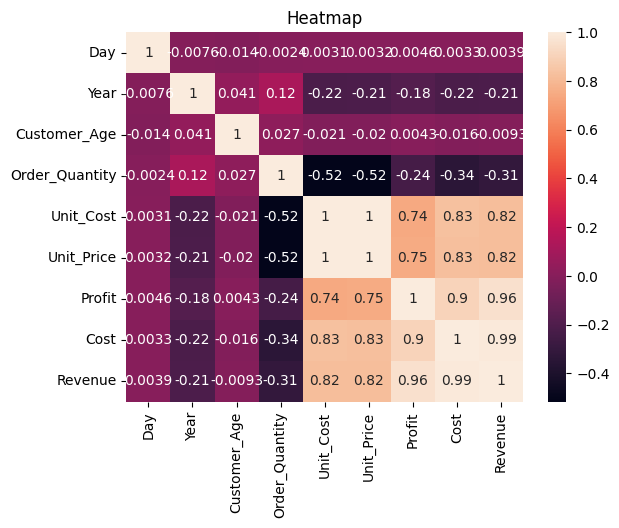

In [16]:
#Plotting the correlation heatmap
def correlation_heatmap(correlation_matrix, labels, dpi=300):


    sns.heatmap(correlation_matrix, annot=True, xticklabels=labels, yticklabels=labels)
    plt.title('Heatmap')
    plt.show()

correlation_matrix =  description1
labels = ['Day',	'Year',	'Customer_Age',	'Order_Quantity',	'Unit_Cost',	'Unit_Price',	'Profit',	'Cost',	'Revenue']

# Calling function
correlation_heatmap(correlation_matrix, labels)

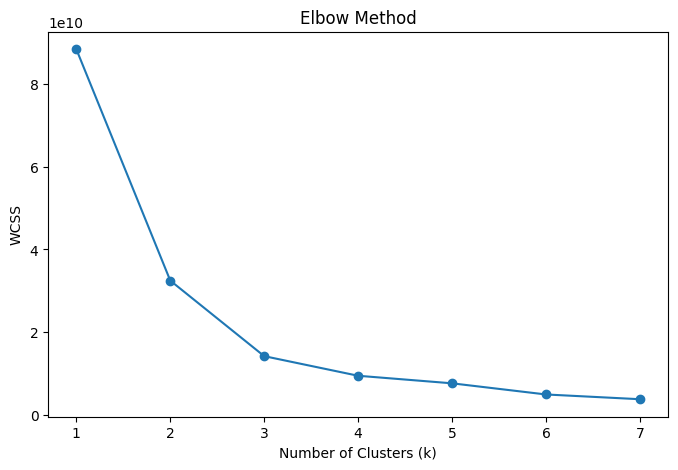

In [44]:
X = dataframe[['Customer_Age', 'Cost']]

# Elbow Method to find optimal k
wcss = []  # Within-cluster sum of squares

for i in range(1, 8):  # Try cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()



In [30]:
# Fit K-means with the chosen number of clusters (e.g., k=3)
optimal_k = 3  # Replace this with your chosen value from the elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

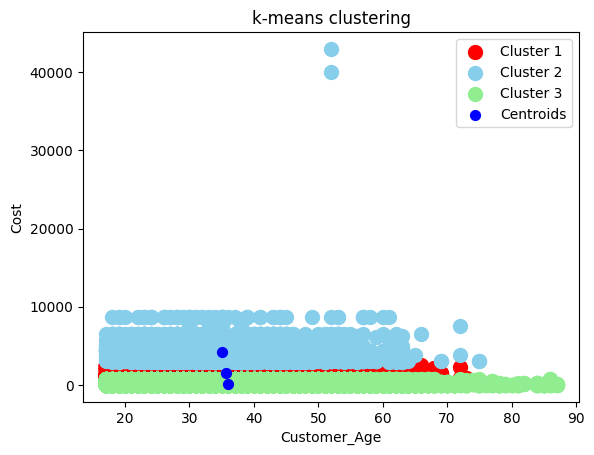

In [36]:
# Access data for plotting using .iloc with boolean indexing for rows and column indices
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'skyblue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'Centroids')
plt.title('k-means clustering')
plt.xlabel('Customer_Age')
plt.ylabel('Cost')
plt.legend()
plt.show() # Add plt.show() to display the plot

In [ ]:
#fitting

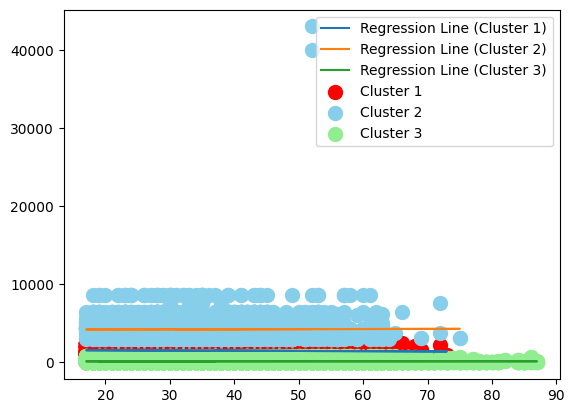

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# ... (Your existing K-means clustering code) ...

# Line Fitting for each cluster
for cluster_num in range(optimal_k):
    # Get data points for the current cluster
    cluster_data = X[y_kmeans == cluster_num]

    # Create and fit Linear Regression model
    regression_model = LinearRegression()
    regression_model.fit(cluster_data[['Customer_Age']], cluster_data['Cost'])

    # Get regression line equation
    slope = regression_model.coef_[0]
    intercept = regression_model.intercept_

    # Plot the regression line
    plt.plot(cluster_data['Customer_Age'],
             slope * cluster_data['Customer_Age'] + intercept,
             label=f'Regression Line (Cluster {cluster_num + 1})')

# ... (Your existing code for plotting clusters) ...
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'skyblue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'lightgreen', label = 'Cluster 3')

plt.legend()  # Show legend with regression lines
plt.show()

In [23]:
#Caluculate the mean values
def mean_for_columns():

  for i in all_columns:
    mean_value = dataframe[i].mean()
    print("Mean of", i, ":", mean_value)

all_columns = ['Day',	'Year',	'Customer_Age',	'Order_Quantity',	'Unit_Cost',	'Unit_Price',	'Profit',	'Cost',	'Revenue']
mean_for_columns()

Mean of Day : 15.665752503627163
Mean of Year : 2014.4017392689054
Mean of Customer_Age : 35.91921157861212
Mean of Order_Quantity : 11.901659648253654
Mean of Unit_Cost : 267.296365759581
Mean of Unit_Price : 452.9384266959199
Mean of Profit : 285.0516649562971
Mean of Cost : 469.3186949290492
Mean of Revenue : 754.3703598853463


In [24]:
#Calculate the median values
def median_for_columns():

  for i in all_columns:
    median_value = dataframe[i].median()
    print("median of", i, ":", median_value)

all_columns = ['Day',	'Year',	'Customer_Age',	'Order_Quantity',	'Unit_Cost',	'Unit_Price',	'Profit',	'Cost',	'Revenue']
median_for_columns()


median of Day : 16.0
median of Year : 2014.0
median of Customer_Age : 35.0
median of Order_Quantity : 10.0
median of Unit_Cost : 9.0
median of Unit_Price : 24.0
median of Profit : 101.0
median of Cost : 108.0
median of Revenue : 223.0


In [25]:
#Calculate the standard deviation
def standard_deviation_for_columns():

  for i in all_columns:
    standard_deviation_value = dataframe[i].std()
    print("Standard Deviation of", i, ":", standard_deviation_value)

all_columns = ['Day',	'Year',	'Customer_Age',	'Order_Quantity',	'Unit_Cost',	'Unit_Price',	'Profit',	'Cost',	'Revenue']
standard_deviation_for_columns()

Standard Deviation of Day : 8.781566778213937
Standard Deviation of Year : 1.2725103861597218
Standard Deviation of Customer_Age : 11.021935623682856
Standard Deviation of Order_Quantity : 9.56185675955091
Standard Deviation of Unit_Cost : 549.8354831077943
Standard Deviation of Unit_Price : 922.0712193271768
Standard Deviation of Profit : 453.8874430557028
Standard Deviation of Cost : 884.8661177053738
Standard Deviation of Revenue : 1309.0946735270197


In [26]:
#Calculation of skewness
def skewness_for_columns():

  for i in all_columns:
    skewness_value = dataframe[i].skew()
    print("skewness of", i, ":", skewness_value)

all_columns = ['Day',	'Year',	'Customer_Age',	'Order_Quantity',	'Unit_Cost',	'Unit_Price',	'Profit',	'Cost',	'Revenue']
skewness_for_columns()

skewness of Day : 0.01372201285962089
skewness of Year : -0.37112036810403015
skewness of Customer_Age : 0.5253002710725994
skewness of Order_Quantity : 0.3781792744116754
skewness of Unit_Cost : 2.1115484045760655
skewness of Unit_Price : 2.0880413908486926
skewness of Profit : 4.00266183726777
skewness of Cost : 5.083239348566859
skewness of Revenue : 4.670907765487898


In [27]:
#Calculation of kurtosis
def kurtosis_for_columns():

  for i in all_columns:
    kurtosis_value = dataframe[i].kurtosis()
    print("kurtosis of", i, ":", kurtosis_value)

all_columns = ['Day',	'Year',	'Customer_Age',	'Order_Quantity',	'Unit_Cost',	'Unit_Price',	'Profit',	'Cost',	'Revenue']
kurtosis_for_columns()


kurtosis of Day : -1.1900823861368324
kurtosis of Year : -0.511186350603523
kurtosis of Customer_Age : -0.11887349634583444
kurtosis of Order_Quantity : -1.2318761257216888
kurtosis of Unit_Cost : 3.3382505833884624
kurtosis of Unit_Price : 3.1499842611857742
kurtosis of Profit : 35.37104990077343
kurtosis of Cost : 97.50878369930501
kurtosis of Revenue : 72.37154543004694
